In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [46]:
df = pd.read_csv("datasetketinggiandancurah.csv")

In [47]:
df.head()

,Waktu,ketinggian,intensitas,kategori_banjir
0,01/01/2015,5.63,33,Siaga1
1,02/01/2015,4.98,NaN,aman
2,03/01/2015,4.69,0,aman
3,04/01/2015,4.94,11.5,aman
4,05/01/2015,4.61,2,aman


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Waktu            1461 non-null   object 
 1   ketinggian       1461 non-null   float64
 2   intensitas       704 non-null    object 
 3   kategori_banjir  1461 non-null   object 
dtypes: float64(1), object(3)
memory usage: 45.8+ KB


In [49]:
df.shape

(1461, 4)

### **Preprocessing Data**

In [50]:
#df['Kategori Banjir'].unique()

In [51]:
#change object to float64
df['intensitas'] = pd.to_numeric(df['intensitas'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Waktu            1461 non-null   object 
 1   ketinggian       1461 non-null   float64
 2   intensitas       703 non-null    float64
 3   kategori_banjir  1461 non-null   object 
dtypes: float64(2), object(2)
memory usage: 45.8+ KB


In [52]:
def kategori(height_m, intensitas_hujan_mm):
  if (height_m >= 0 and height_m <= 5) and (intensitas_hujan_mm >= 0 and intensitas_hujan_mm <= 50):
    return 'aman'
  elif (height_m > 5 and height_m <= 6) and (intensitas_hujan_mm >= 0 and intensitas_hujan_mm <= 50):
    return 'Siaga1'
  elif (height_m > 5 and height_m <= 6) and (intensitas_hujan_mm > 50 and intensitas_hujan_mm <= 100):
    return 'Siaga1'
  elif (height_m > 6) and (intensitas_hujan_mm > 50 and intensitas_hujan_mm <= 100):
    return 'Siaga2'
  elif (height_m > 6) and (intensitas_hujan_mm > 100):
    return 'Siaga2'
  else: return 'aman'

In [53]:
df['kategori']= df.apply(lambda x: kategori(x['ketinggian'], x['intensitas']), axis=1)

In [54]:
df

,Waktu,ketinggian,intensitas,kategori_banjir,kategori
0,01/01/2015,5.63,33.0,Siaga1,Siaga1
1,02/01/2015,4.98,NaN,aman,aman
2,03/01/2015,4.69,0.0,aman,aman
3,04/01/2015,4.94,11.5,aman,aman
4,05/01/2015,4.61,2.0,aman,aman
...,...,...,...,...,...
1456,27/12/2018,4.57,16.0,aman,aman
1457,28/12/2018,4.73,3.5,aman,aman
1458,29/12/2018,4.84,NaN,aman,aman
1459,30/12/2018,4.41,NaN,aman,aman


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Waktu            1461 non-null   object 
 1   ketinggian       1461 non-null   float64
 2   intensitas       703 non-null    float64
 3   kategori_banjir  1461 non-null   object 
 4   kategori         1461 non-null   object 
dtypes: float64(2), object(3)
memory usage: 57.2+ KB


In [56]:
df['kategori'].unique()

array(['Siaga1', 'aman', 'Siaga2'], dtype=object)

In [57]:
df.isnull().sum()

Waktu                0
ketinggian           0
intensitas         758
kategori_banjir      0
kategori             0
dtype: int64

In [58]:
df.fillna((0), inplace = True)
df.head()

,Waktu,ketinggian,intensitas,kategori_banjir,kategori
0,01/01/2015,5.63,33.0,Siaga1,Siaga1
1,02/01/2015,4.98,0.0,aman,aman
2,03/01/2015,4.69,0.0,aman,aman
3,04/01/2015,4.94,11.5,aman,aman
4,05/01/2015,4.61,2.0,aman,aman


In [59]:
df.isnull().sum()

Waktu              0
ketinggian         0
intensitas         0
kategori_banjir    0
kategori           0
dtype: int64

In [60]:
banjir_df=df.drop(columns='kategori')
banjir_df.head()

,Waktu,ketinggian,intensitas,kategori_banjir
0,01/01/2015,5.63,33.0,Siaga1
1,02/01/2015,4.98,0.0,aman
2,03/01/2015,4.69,0.0,aman
3,04/01/2015,4.94,11.5,aman
4,05/01/2015,4.61,2.0,aman


In [61]:
banjir_df.describe()

,ketinggian,intensitas
count,1461.000000,1461.000000
mean,4.266121,6.221355
std,1.350780,13.125006
min,1.030000,0.000000
25%,3.430000,0.000000
50%,4.180000,0.000000
75%,5.040000,6.000000
max,35.000000,92.000000


In [62]:
banjir_df.corr()

,ketinggian,intensitas
ketinggian,1.000000,0.319915
intensitas,0.319915,1.000000


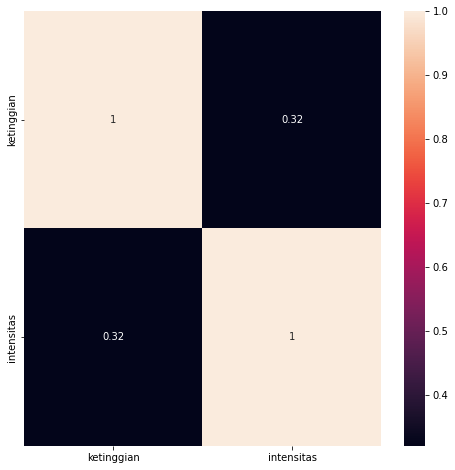

In [63]:
plt.figure(figsize=(8, 8))
sns.heatmap(banjir_df.corr(),annot=True)

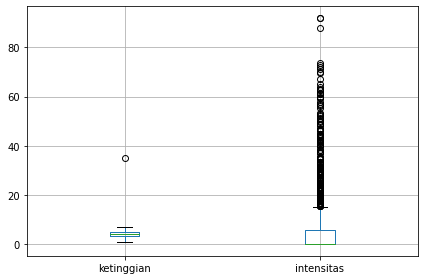

In [64]:
banjir_df.boxplot()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


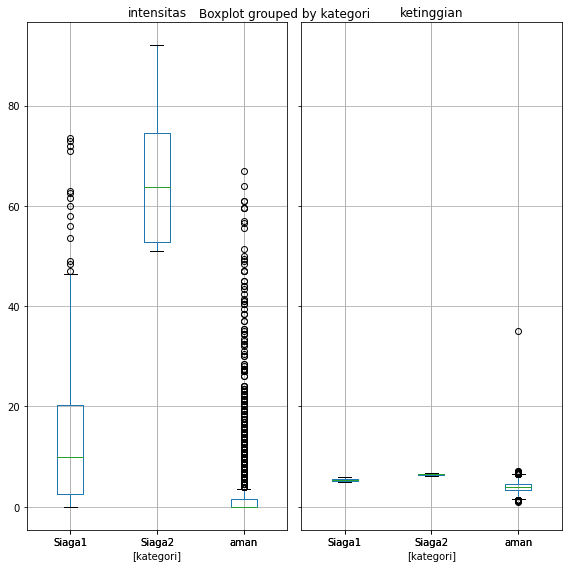

In [65]:
df.boxplot(by='kategori', figsize=(8,8))
plt.tight_layout()

In [66]:
df['kategori'].replace(['aman','Siaga1','Siaga2'],[0,1,2],inplace=True)
df.head()

,Waktu,ketinggian,intensitas,kategori_banjir,kategori
0,01/01/2015,5.63,33.0,Siaga1,1
1,02/01/2015,4.98,0.0,aman,0
2,03/01/2015,4.69,0.0,aman,0
3,04/01/2015,4.94,11.5,aman,0
4,05/01/2015,4.61,2.0,aman,0


In [67]:
df['kategori'].value_counts()

0    1202
1     247
2      12
Name: kategori, dtype: int64

In [68]:
#Now let's seperate the data which we are gonna use for prediction
x = df.iloc[:,1:3]
x.head()

,ketinggian,intensitas
0,5.63,33.0
1,4.98,0.0
2,4.69,0.0
3,4.94,11.5
4,4.61,2.0


In [69]:
#Now seperate the flood label from the dataset
y = df.iloc[:, -1]
y.head()

0    1
1    0
2    0
3    0
4    0
Name: kategori, dtype: int64

### **Decision Tree**

In [70]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [71]:
#Let's see how our train set looks like
x_train.head()

,ketinggian,intensitas
1098,5.24,13.5
1147,5.41,3.5
503,6.24,14.5
601,3.39,0.0
1064,5.03,1.5


In [72]:
y_train.head()

1098    1
1147    1
503     0
601     0
1064    1
Name: kategori, dtype: int64

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
dtc_clf = DecisionTreeClassifier()
x_train = x_train.values
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.96232877, 0.9760274 , 0.97260274])

In [74]:
y_pred = dtc_clf.predict(x_train)
print("\naccuracy score:%f"%(accuracy_score(y_train,y_pred)*100))
print("recall score:%f"%(recall_score(y_train,y_pred,average='micro')*100))


accuracy score:99.429224
recall score:99.429224


In [75]:
cm=confusion_matrix(y_train,y_pred)
print('Confusion Matrix: \n', cm)
print(metrics.classification_report(y_train, y_pred))

Confusion Matrix: 
 [[710   0   0]
 [  5 152   0]
 [  0   0   9]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       710
           1       1.00      0.97      0.98       157
           2       1.00      1.00      1.00         9

    accuracy                           0.99       876
   macro avg       1.00      0.99      0.99       876
weighted avg       0.99      0.99      0.99       876



In [76]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [77]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 0

In [78]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred,average='micro')*100))
#print("roc score:%f"%(roc_auc_score(y_test,y_pred,average='micro')*100))


accuracy score:97.606838
recall score:97.606838


In [79]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix: 
 [[483   9   0]
 [  5  85   0]
 [  0   0   3]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       492
           1       0.90      0.94      0.92        90
           2       1.00      1.00      1.00         3

    accuracy                           0.98       585
   macro avg       0.96      0.98      0.97       585
weighted avg       0.98      0.98      0.98       585



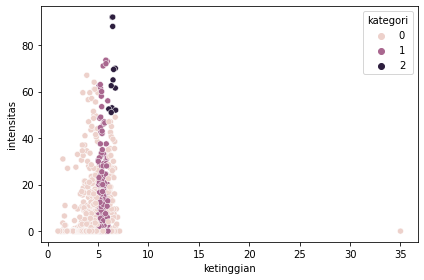

In [80]:
sns.scatterplot(x='ketinggian', y='intensitas', data=df, hue='kategori')
plt.tight_layout()

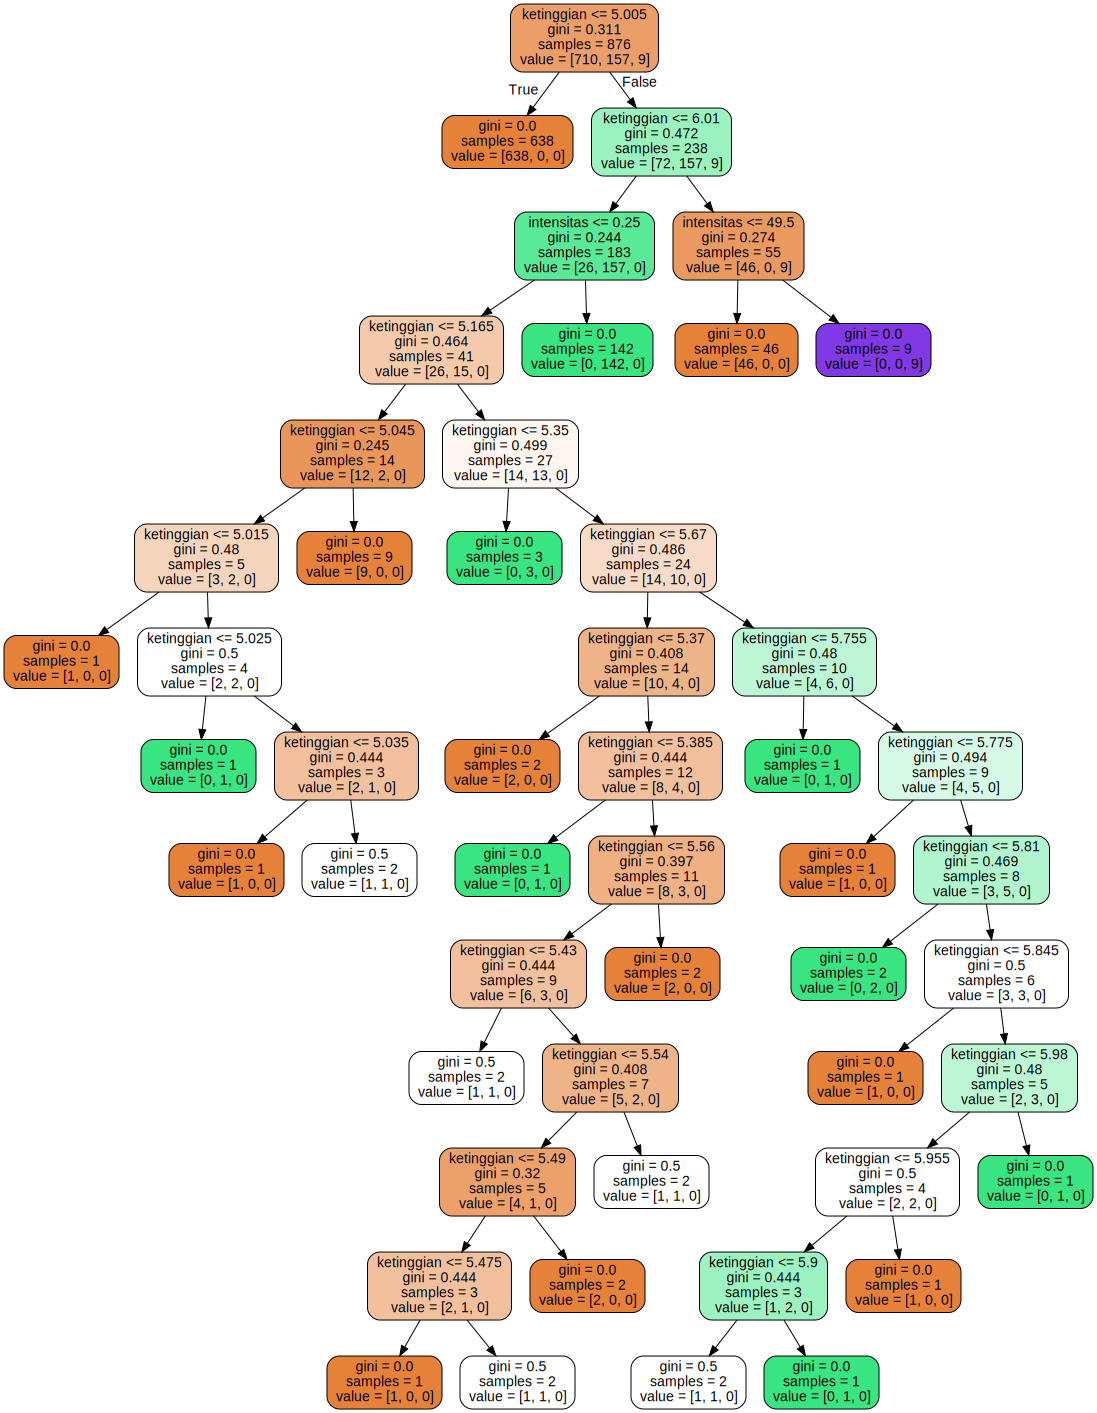

In [81]:
# Visualize the tree by graphiz
import graphviz
from sklearn import tree
feature_names = ['ketinggian','intensitas']
dot_data = tree.export_graphviz(dtc_clf, out_file=None, filled=True, rounded = True, feature_names=feature_names)
graph = graphviz.Source(dot_data)
graph

In [82]:
x_new=[[5, 10]]
pred = dtc_clf.predict(x_new)
print (pred)

[0]


In [83]:
import pickle

In [84]:
pickle.dump(dtc_clf, open('model.pkl', 'wb'))

In [85]:
model = pickle.load(open('model.pkl', 'rb'))
print(model)

DecisionTreeClassifier()
